In [170]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [203]:
print("Reading data into dataframe...")
df = pd.read_csv("../ML_Data/working_xs_v1_unsk.csv")
print("Data read into dataframe!")

Reading data into dataframe...
Data read into dataframe!


In [204]:
df.columns

Index(['Target_Meta_State', 'MT', 'Energy', 'dEnergy', 'Data', 'dData',
       'ELV/HL', 'dELV/HL', 'I78', 'Refer', 'Protons', 'Product_Meta_State',
       'Frame', 'Reaction_Notation', 'Title', 'Year', 'Author', 'Institute',
       'Date', 'Reference', 'Out', 'Target_Neutrons', 'Origin', 'Mass_Excess',
       'dMass_Excess', 'Binding_Energy', 'dBinding_Energy', 'B_Decay_Energy',
       'dB_Decay_Energy', 'Atomic_Mass_Micro', 'dAtomic_Mass_Micro', 'S(2n)',
       'dS(2n)', 'S(2p)', 'dS(2p)', 'Q(a)', 'dQ(a)', 'Q(2B-)', 'dQ(2B-)',
       'Q(ep)', 'dQ(ep)', 'Q(B-n)', 'dQ(B-n)', 'Target_Mass_Number', 'Element',
       'S(n)', 'dS(n)', 'S(p)', 'dS(p)', 'Q(4B-)', 'dQ(4B-)', 'Q(d,a)',
       'dQ(d,a)', 'Q(p,a)', 'dQ(p,a)', 'Q(n,a)', 'dQ(n,a)', 'Q(g,p)', 'Q(g,n)',
       'Q(g,pn)', 'Q(g,d)', 'Q(g,t)', 'Q(g,He3)', 'Q(g,2p)', 'Q(g,2n)',
       'Q(g,a)', 'Q(p,n)', 'Q(p,2p)', 'Q(p,pn)', 'Q(p,d)', 'Q(p,2n)', 'Q(p,t)',
       'Q(p,3He)', 'Q(n,2p)', 'Q(n,np)', 'Q(n,d)', 'Q(n,2n)', 'Q(n,t)',
       'Q

In [205]:
str_cols = ["Target_Meta_State", "MT", "I78", "Refer", "Product_Meta_State", "Frame", "Reaction_Notation", "Title", "Author", "Institute", "Reference", "Out", "Origin", "Element"]
df[str_cols] = df[str_cols].astype('category')

for col in list(df.columns):
    if col not in str_cols:
        df[col] = df[col].astype(float)
        
int_cols = ["Protons", "Target_Neutrons", "Target_Mass_Number", "Year", "Date", "Compound_Neutrons", "Compound_Mass_Number"]
df[int_cols] = df[int_cols].astype(int)

In [206]:
# df.Reference = pd.Categorical(df.Reference)
# df["Reference_Code"] = df.Reference.cat.codes

# Exploratory Data Analysis

Let us use a sample of the dataset, specifically Chlorine 35 (n,p) reaction. 

In [207]:
new_data = pd.read_csv("./Chlorine_Data/new_cl_np.csv")  
new_data["Energy"] = np.log10(new_data["Energy"])
new_data.head()

Energy  dEnergy    Data   dData
0  6.383815    20000  0.0166  0.0053
1  6.383815    20000  0.0196  0.0054
2  6.401401    30000  0.0261  0.0035
3  6.401401    30000  0.0257  0.0036
4  6.411620    30000  0.0446  0.0030

In [216]:
def plot_exfor(protons, mass_number, mt, interpolate=False, legend=True, alpha=0.7):
    to_plot = df[(df["Protons"] == protons) & (df["MT"] == mt) & (df["Target_Mass_Number"] == mass_number)].sort_values(by='Energy', ascending=False)
    fg = sns.FacetGrid(data=to_plot[["Energy", "Data", "Reference"]], hue='Reference', hue_order=to_plot["Reference"].unique(), aspect=1.5, legend_out=False, height=10)
    fg.map(plt.scatter, "Energy", "Data", alpha=alpha)
    if legend == True:
        fg.add_legend()
    if interpolate == True:
        sns.lineplot(to_plot["Energy"], to_plot["Data"], alpha=alpha*0.5, label="Interpolation")
    plt.title("Z = {}, A = {}, MT = {}".format(protons, mass_number, mt))
    plt.xlabel('log[Energy(eV)]')
    plt.ylabel('log[Cross Section (b)]')
    plt.yscale('log')
    minimum = to_plot["Data"].min() - to_plot["Data"].min() * 0.2
    maximum = to_plot["Data"].max() + to_plot["Data"].max() * 0.2
    plt.ylim(minimum, maximum)

    
def plot_new_cl_data(protons, mass_number, mt):
    to_plot = df[(df["Protons"] == protons) & (df["MT"] == mt) & (df["Target_Mass_Number"] == mass_number)].sort_values(by='Energy', ascending=False)
    plt.figure(figsize=(15,10))
    sns.scatterplot(to_plot["Energy"], to_plot["Data"], alpha=0.5, label="True")
    sns.lineplot(to_plot["Energy"], to_plot["Data"], alpha=0.5, label="Interpolation")
    sns.scatterplot(new_data["Energy"], new_data["Data"], alpha=0.5, label="New Data")
    plt.title('Cl-35(n,p) SIG')
    plt.xlabel('Energy(eV)')
    plt.ylabel('Cross Section (b)')
    plt.yscale('log')
    minimum = to_plot["Data"].min() - to_plot["Data"].min() * 0.2
    maximum = to_plot["Data"].max() + to_plot["Data"].max() * 0.2
    plt.ylim(minimum, maximum)
    plt.legend()
    plt.show()

3.84e-05 10.476


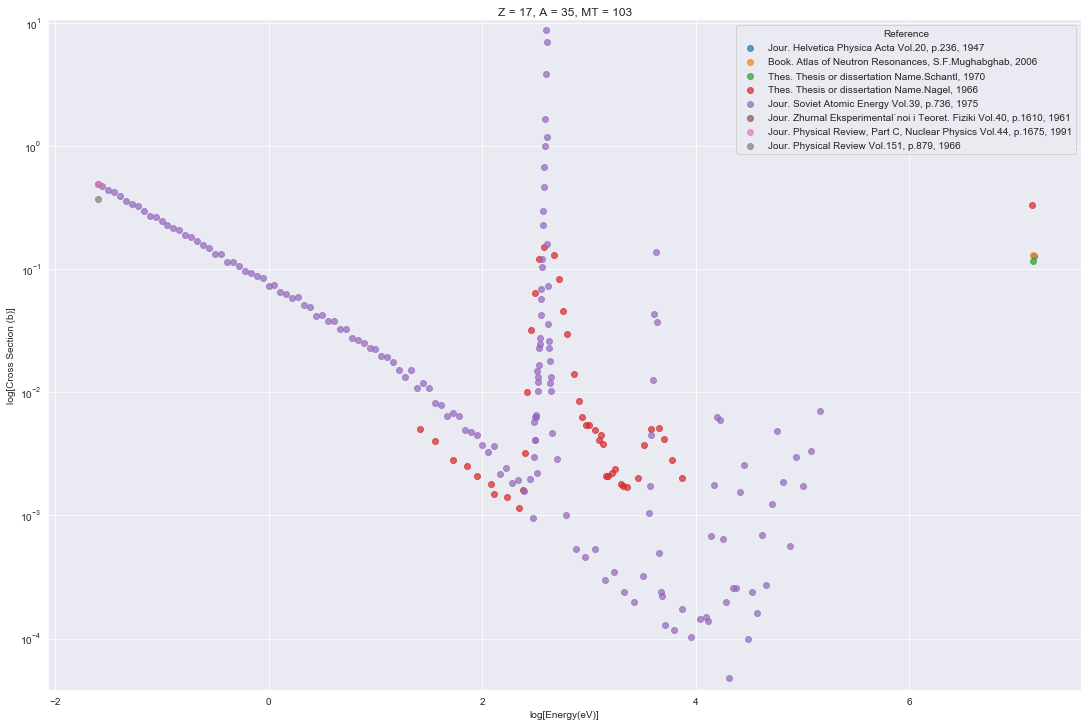

In [217]:
plot_exfor(17, 35, 103, legend=True)

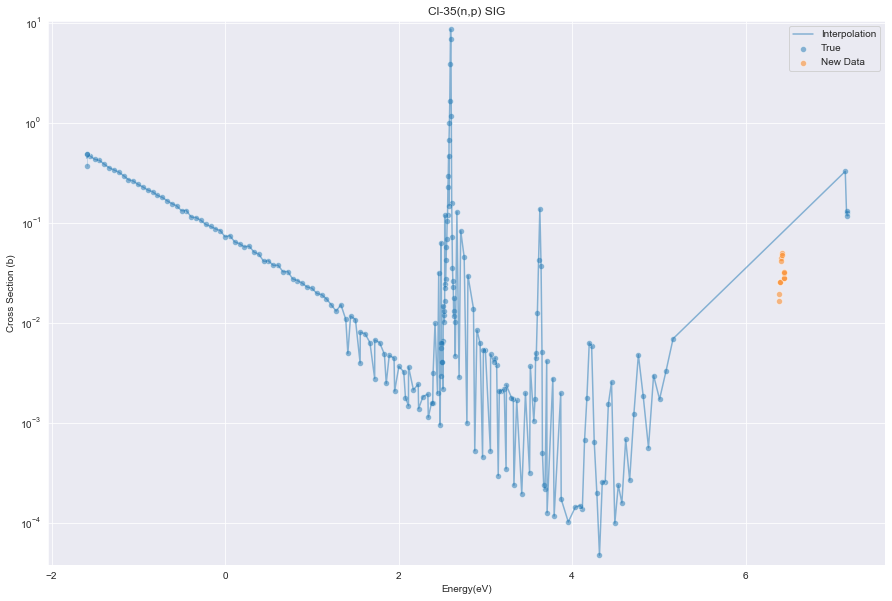

In [218]:
plot_new_cl_data(17, 35, 103)

# Numerical Features

Lets follow up with the Chlorine-35 (n,p) example.

In [219]:
to_plot = df[(df["Protons"] == 17) & (df["MT"] == 103) & (df["Target_Mass_Number"] == 35)].sort_values(by='Energy', ascending=False)

In [223]:
to_plot.describe()

Energy     dEnergy        Data       dData  ELV/HL  dELV/HL  \
count  216.000000  216.000000  216.000000  216.000000   216.0    216.0   
mean     2.264699    0.178294    0.168940    0.010092     0.0      0.0   
std      1.791626    1.798738    0.812348    0.053197     0.0      0.0   
min     -1.596879   -3.685826    0.000048    0.000000     0.0      0.0   
25%      1.265518   -0.823428    0.002100    0.000120     0.0      0.0   
50%      2.545426    0.456479    0.010100    0.000965     0.0      0.0   
75%      3.376202    1.287256    0.073650    0.003300     0.0      0.0   
max      7.167317    5.301030    8.730000    0.570000     0.0      0.0   

       Protons         Year          Date  Target_Neutrons   Mass_Excess  \
count    216.0   216.000000  2.160000e+02            216.0    216.000000   
mean      17.0  1984.662037  1.993674e+07             18.0 -28940.556340   
std        0.0    12.371071  4.075400e+04              0.0   1072.459992   
min       17.0  1961.000000  1.992020e+07             18.0 -29013.528000   
25%       17.0  1991.000000  1.992020e+07             18.0 -29013.528000   
50%       17.0  1991.000000  1.992020e+07             18.0 -29013.528000   
75%       17.0  1991.000000  1.992020e+07             18.0 -29013.528000   
max       17.0  2006.000000  2.017040e+07             18.0 -13251.649500   

       dMass_Excess  Binding_Energy  dBinding_Energy  B_Decay_Energy  \
count    216.000000      216.000000       216.000000      216.000000   
mean       0.901059     8518.131541         0.021770    -5916.991437   
std       12.728416       31.546375         0.305251      723.847195   
min        0.035000     8056.642875         0.001000    -5966.243000   
25%        0.035000     8520.278000         0.001000    -5966.243000   
50%        0.035000     8520.278000         0.001000    -5966.243000   
75%        0.035000     8520.278000         0.001000    -5966.243000   
max      187.103750     8520.278000         4.487250     4672.094682   

       dB_Decay_Energy  Atomic_Mass_Micro  dAtomic_Mass_Micro         S(2n)  \
count       216.000000       2.160000e+02          216.000000    216.000000   
mean          1.645520       3.480696e+07            0.967523  24119.670213   
std          14.204891       2.379327e+06           13.661145    487.347356   
min           0.679000       3.545300e+01            0.038000  16990.315909   
25%           0.679000       3.496885e+07            0.038000  24152.830000   
50%           0.679000       3.496885e+07            0.038000  24152.830000   
75%           0.679000       3.496885e+07            0.038000  24152.830000   
max         209.447409       3.496885e+07          200.815000  24152.830000   

           dS(2n)         S(2p)      dS(2p)          Q(a)       dQ(a)  \
count  216.000000    216.000000  216.000000    216.000000  216.000000   
mean     1.485549  17280.916168    2.250758  -7018.634572    1.349583   
std     16.101220    393.821631   17.059583    304.734725   19.246866   
min      0.390000  17254.120000    1.090000 -11476.567500    0.040000   
25%      0.390000  17254.120000    1.090000  -6997.900000    0.040000   
50%      0.390000  17254.120000    1.090000  -6997.900000    0.040000   
75%      0.390000  17254.120000    1.090000  -6997.900000    0.040000   
max    237.028636  23042.092273  251.813636  -6997.900000  282.910000   

             Q(2B-)     dQ(2B-)         Q(ep)      dQ(ep)        Q(B-n)  \
count    216.000000  216.000000    216.000000  216.000000    216.000000   
mean  -17728.575350    1.502852 -11771.969257    1.960273 -18637.117070   
std     1647.007271   14.591883    267.032453   16.905497   1020.598467   
min   -17840.640000    0.510000 -15678.359524    0.810000 -18706.560000   
25%   -17840.640000    0.510000 -11753.800000    0.810000 -18706.560000   
50%   -17840.640000    0.510000 -11753.800000    0.810000 -18706.560000   
75%   -17840.640000    0.510000 -11753.800000    0.810000 -18706.560000   
max     6365.324500  214.966000 -11753.8

We can explor correlation among features but as we know beforehand, cross section do not behave linearly. Let us use the chlorine 35 n,p cross sections as an example.

In [224]:
pd.DataFrame(to_plot.corr()).sort_values(by='Data', ascending=False).head()

Energy   dEnergy      Data     dData  ELV/HL  dELV/HL  \
Data            -0.047498 -0.047388  1.000000  0.993686     NaN      NaN   
dData            0.030674  0.030825  0.993686  1.000000     NaN      NaN   
Year            -0.244060 -0.245155  0.090526  0.083984     NaN      NaN   
S(p)            -0.147335 -0.146849  0.016919  0.012732     NaN      NaN   
dBinding_Energy -0.147335 -0.146849  0.016919  0.012732     NaN      NaN   

                 Protons      Year      Date  Target_Neutrons  Mass_Excess  \
Data                 NaN  0.090526 -0.026421              NaN     0.016919   
dData                NaN  0.083984 -0.007100              NaN     0.012732   
Year                 NaN  1.000000 -0.534500              NaN     0.117906   
S(p)                 NaN  0.117906  0.308570              NaN     1.000000   
dBinding_Energy      NaN  0.117906  0.308570              NaN     1.000000   

                 dMass_Excess  Binding_Energy  dBinding_Energy  \
Data                 0.016919       -0.016919         0.016919   
dData                0.012732       -0.012732         0.012732   
Year                 0.117906       -0.117906         0.117906   
S(p)                 1.000000       -1.000000         1.000000   
dBinding_Energy      1.000000       -1.000000         1.000000   

                 B_Decay_Energy  dB_Decay_Energy  Atomic_Mass_Micro  \
Data                   0.016919         0.016919          -0.016919   
dData                  0.012732         0.012732          -0.012732   
Year                   0.117906         0.117906          -0.117906   
S(p)                   1.000000         1.000000          -1.000000   
dBinding_Energy        1.000000         1.000000          -1.000000   

                 dAtomic_Mass_Micro     S(2n)    dS(2n)     S(2p)    dS(2p)  \
Data                       0.016919 -0.016919  0.016919  0.016919  0.016919   
dData                      0.012732 -0.012732  0.012732  0.012732  0.012732   
Year                       0.117906 -0.117906  0.117906  0.117906  0.117906   
S(p)                       1.000000 -1.000000  1.000000  1.000000  1.000000   
dBinding_Energy            1.000000 -1.000000  1.000000  1.000000  1.000000   

                     Q(a)     dQ(a)    Q(2B-)   dQ(2B-)     Q(ep)    dQ(ep)  \
Data            -0.016919  0.016919  0.016919  0.016919 -0.016919  0.016919   
dData           -0.012732  0.012732  0.012732  0.012732 -0.012732  0.012732   
Year            -0.117906  0.117906  0.117906  0.117906 -0.117906  0.117906   
S(p)            -1.000000  1.000000  1.000000  1.000000 -1.000000  1.000000   
dBinding_Energy -1.000000  1.000000  1.000000  1.000000 -1.000000  1.000000   

                   Q(B-n)   dQ(B-n)  Target_Mass_Number      S(n)     dS(n)  \
Data             0.016919  0.016919                 NaN -0.016919  0.016919   
dData            0.012732  0.012732                 NaN -0.012732  0.012732   
Year             0.117906  0.117906                 NaN -0.117906  0.117906   
S(p)             1.000000  1.000000                 NaN -1.000000  1.000000   
dBinding_Energy  1.000000  1.000000                 NaN -1.000000  1.000000   

                     S(p)     dS(p)        Q(4B-)       dQ(4B-)    Q(d,a)  \
Data             0.016919  0.016919 -1.600121e-17 -1.600121e-17 -0.016919   
dData            0.012732  0.012732 -2.782454e-16 -2.782454e-16 -0.012732   
Year             0.117906  0.117906 -7.229779e-15 -7.229779e-15 -0.117906   
S(p)             1.000000  1.000000  1.445825e-13  1.445825e-13 -1.000000   
dBinding_Energy  1.000000  1.000000 -2.160317e-16 -2.160317e-16 -1.000000   

                  dQ(d,a)    Q(p,a)   dQ(p,a)    Q(n,a)   dQ(n,a)    Q(g,p)  \
Data             0.016919 -0.016919  0.016919 -0.016919  0.016919 -0.016919   
dData            0.012732 -0.012732  0.012732 -0.012732  0.012732 -0.012732   
Year             0.117906 -0.117906  0.117906 -0.117906  0.117906 -0.117906   
S(p)             1.000000 -1.000000  1.000000 -1.000000  1.000000

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [225]:
from scipy import stats

In [226]:
pearson_coef, p_value = stats.pearsonr(to_plot['Energy'], to_plot['Data'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.047498325481320915  with a P-value of P = 0.4874179605105733


The energy is weakley linearly correlated. The p-value results in 1% confidence that this correlation is significant. We therefore expect that a linear model will work poorly in this data. As a nuclear engineer, we know that there are depedences on Energy depending on the region. One solution could be to split the data into the appropiate energy ranges but that would defeat the purpose of this project.

In [227]:
num_columns = []
for col in list(df.columns):
    if col not in str_cols:
        num_columns.append(col)

In [229]:
fig, ax = plt.subplots(figsize=(25,30))
to_plot[num_columns].hist(ax=ax)
plt.savefig(r'./Figures/example.png', ext='png', bbox_inches="tight")  
plt.close(fig)

We can see that several features are extremeley negatively skewed. This introduces problems to almost all ML algorithms as we shall demonstrate in the next notebook. 

In [230]:
from scipy.stats import skew

- skewness = 0 : normally distributed.
- skewness > 0 : more weight in the left tail of the distribution.
- skewness < 0 : more weight in the right tail of the distribution.

In [232]:
case_list = {}

for col in num_columns:
    skewness = skew(to_plot[col].values)
    case = {col: skewness}
    case_list.update(case)
    
skew_df = pd.Series(case_list).to_frame().reset_index()
skew_df.columns = ["Column_Name", "Skewness"]
skew_df = skew_df.sort_values(by=["Skewness"], ascending=False)

In [233]:
skew_df[(skew_df["Skewness"] > 1.00) | (skew_df["Skewness"] < -1.00)]

Column_Name   Skewness
50            Q(g,2n)  14.594679
33               S(p)  14.594679
20              S(2p)  14.594679
65             Q(d,t)  14.594679
57             Q(p,t)  14.594679
24             Q(2B-)  14.594679
56            Q(p,2n)  14.594679
62            Q(n,2n)  14.594679
44             Q(g,n)  14.594679
54            Q(p,pn)  14.594679
42            dQ(n,a)  14.594679
67           Q(3He,t)  14.594679
14     B_Decay_Energy  14.594679
52             Q(p,n)  14.594679
55             Q(p,d)  14.594679
34              dS(p)  14.594679
32              dS(n)  14.594679
23              dQ(a)  14.594679
15    dB_Decay_Energy  14.594679
25            dQ(2B-)  14.594679
29            dQ(B-n)  14.594679
11       dMass_Excess  14.594679
38            dQ(d,a)  14.594679
21             dS(2p)  14.594679
13    dBinding_Energy  14.594679
..                ...        ...
46             Q(g,d) -14.594679
58           Q(p,3He) -14.594679
63             Q(n,t) -14.594679
69             Q(t,a) -14.594679
59            Q(n,2p) -14.594679
26              Q(ep) -14.594679
66           Q(d,3He) -14.594679
48           Q(g,He3) -14.594679
64           Q(n,3He) -14.594679
41             Q(n,a) -14.594679
16  Atomic_Mass_Micro -14.594679
31               S(n) -14.594679
51             Q(g,a) -14.594679
22               Q(a) -14.594679
61             Q(n,d) -14.594679
49            Q(g,2p) -14.594679
39             Q(p,a) -14.594679
60            Q(n,np) -14.594679
43             Q(g,p) -14.594679
53            Q(p,2p) -14.594679
18              S(2n) -14.594679
37             Q(d,a) -14.594679
12     Binding_Energy -14.594679
45            Q(g,pn) -14.594679
47             Q(g,t) -14.594679

[62 rows x 2 columns]

In [234]:
# In addition to all uncertanties
# skewed_cols = ["Binding_Energy", "ELV/HL", "Energy", "dBinding_Energy", "dELV/HL", "dEnergy"]
skewed_cols = ["Energy", "dEnergy"]

In [14]:
energy_log = np.log10(df["Energy"].values)
energy_ln = np.log(df["Energy"].values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190D1AAB1D0>]],
      dtype=object)

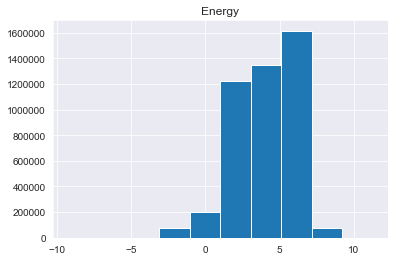

In [235]:
df[["Energy"]].hist()

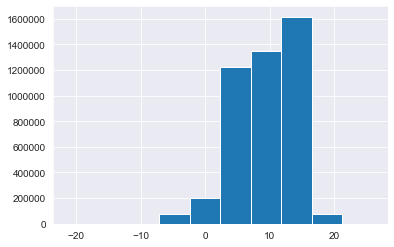

In [17]:
plt.hist(energy_ln)
plt.show()

In [18]:
for col in skewed_cols:
    log_values = np.log10(df[col].values)
    df[col] = log_values

In [23]:
df["Year"] = df["Year"].astype(int)

# Categorical Data

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our data variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [14]:
grouped_test = df[['MT', 'Data']].groupby(['MT'])

f_val, p_val = stats.f_oneway(grouped_test.get_group("1")['Data'], grouped_test.get_group('101')['Data'], grouped_test.get_group('102')['Data'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 15917.016298247428 , P = 0.0


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

In [15]:
def box_plot(x, dataframe=df, figsize=(8,6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=x, y="Data", data=dataframe)

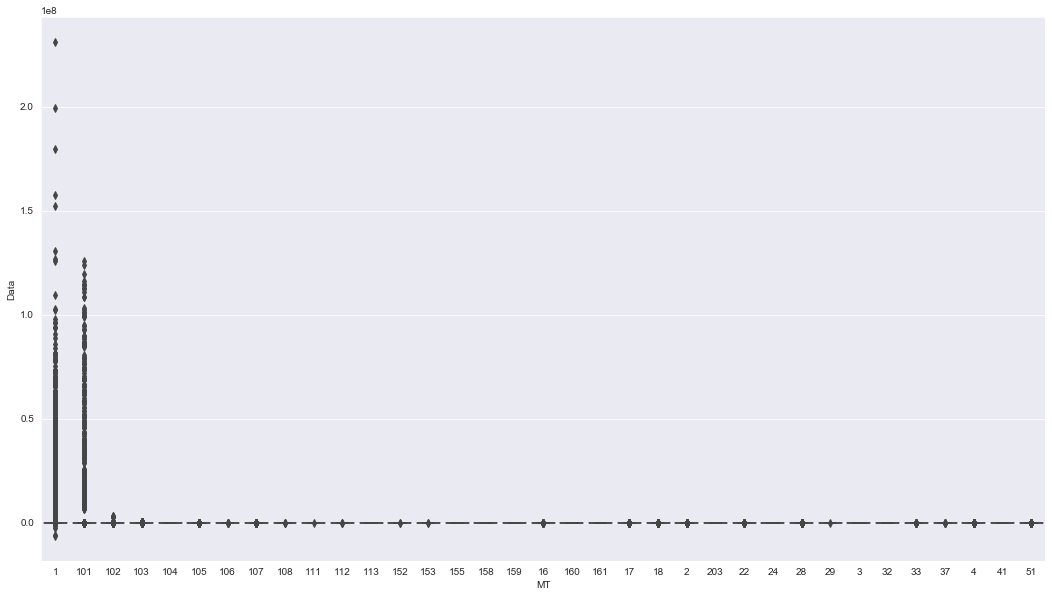

In [17]:
box_plot("MT", figsize=(18,10))

The values for other reaction types get squashed do the large magnitude of fission and total cross section data points (MT1 and MT101). Still it is noticable that these cross sections are magnitudes higher than other types. This feature will be helpful in determining limits to some reaction types (it will learn not to go above certan values.

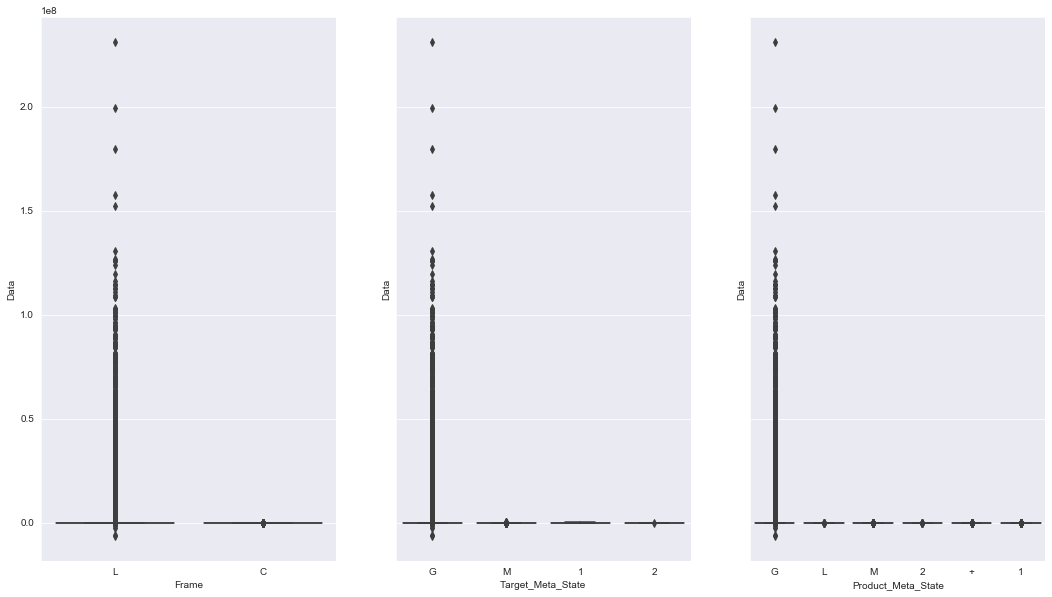

In [18]:
# call regplot on each axes
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(18,10))
sns.boxplot(x="Frame", y="Data", data=df, ax=ax1)
sns.boxplot(x="Target_Meta_State", y="Data", data=df, ax=ax2)
sns.boxplot(x="Product_Meta_State", y="Data", data=df, ax=ax3)

# Investigating Uncertanties

In [31]:
df[["Unc", "Author"]].groupby("Author").count()

Unc
Author              
A.A.Alekseev+   2041
A.A.Berezin+       2
A.A.Bergman+     930
A.A.Druzhinin+    27
A.A.Ebel+         64
...              ...
Zhou You-Pu       66
Zhou Zu-Ying+     12
Zhu Chuan-Xin+     6
Zhu Shengyun+      2
Zo-In-Ok+        592

[2803 rows x 1 columns]

In [33]:
df.columns

Index(['Target_Meta_State', 'MT', 'Energy', 'dEnergy', 'Data', 'dData',
       'ELV/HL', 'dELV/HL', 'I78', 'Refer', 'Protons', 'Product_Meta_State',
       'Frame', 'Reaction_Notation', 'Title', 'Year', 'Author', 'Institute',
       'Out', 'Target_Neutrons', 'Origin', 'Mass_Excess', 'dMass_Excess',
       'Binding_Energy', 'dBinding_Energy', 'B_Decay_Energy',
       'dB_Decay_Energy', 'Atomic_Mass_Micro', 'dAtomic_Mass_Micro', 'S(2n)',
       'dS(2n)', 'S(2p)', 'dS(2p)', 'Q(a)', 'dQ(a)', 'Q(2B-)', 'dQ(2B-)',
       'Q(ep)', 'dQ(ep)', 'Q(B-n)', 'dQ(B-n)', 'Target_Mass_Number', 'Element',
       'S(n)', 'dS(n)', 'S(p)', 'dS(p)', 'Q(4B-)', 'dQ(4B-)', 'Q(d,a)',
       'dQ(d,a)', 'Q(p,a)', 'dQ(p,a)', 'Q(n,a)', 'dQ(n,a)', 'Q(g,p)', 'Q(g,n)',
       'Q(g,pn)', 'Q(g,d)', 'Q(g,t)', 'Q(g,He3)', 'Q(g,2p)', 'Q(g,2n)',
       'Q(g,a)', 'Q(p,n)', 'Q(p,2p)', 'Q(p,pn)', 'Q(p,d)', 'Q(p,2n)', 'Q(p,t)',
       'Q(p,3He)', 'Q(n,2p)', 'Q(n,np)', 'Q(n,d)', 'Q(n,2n)', 'Q(n,t)',
       'Q(n,3He)', 'Q(d,t)', '

In [38]:
df[["Reaction_Notation", "Unc", "Author"]].groupby(["Reaction_Notation", "Author"]).mean()

Unc
Reaction_Notation                                  Author                  
(13-AL-27(N,P)12-MG-27,,SIG)+(13-AL-27(N,N+P)12... L.I.Klochkova+  0.000000
(19-K-CMP(N,TOT),,SIG)=(17-CL-CMP(N,TOT),,SIG)     W.F.E.Pineo+    0.000000
(24-CR-50(N,P)23-V-50,,SIG)+(24-CR-50(N,N+P)23-... L.I.Klochkova+  0.000000
(26-FE-0(N,INL)26-FE-0,PAR,SIG)=(26-FE-56(N,INL... E.Barnard+      0.003321
(26-FE-54(N,P)25-MN-54,,SIG)+(26-FE-54(N,N+P)25... L.I.Klochkova+  0.000000
...                                                                     ...
99-ES-254(N,G)99-ES-255,,SIG                       J.Halperin+     0.000000
99-ES-254(N,G)99-ES-255,,SIG,,,RECOM               S.F.Mughabghab  0.000000
99-ES-254-M(N,F),,SIG,,,RECOM                      S.F.Mughabghab  0.000000
99-ES-254-M1(N,F),,SIG,,MXW                        H.Diamond+      0.000000
99-ES-255(N,G)99-ES-256,,SIG,,,RECOM               S.F.Mughabghab  0.000000

[21617 rows x 1 columns]